In [1]:
import csv
with open('hrishipara_financial_diaries.csv') as var_name:
    reader=csv.reader(var_name)
    A = [row for row in reader]
import pingouin as pg
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
df = pd.DataFrame(A)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df['code']=df['code'].str.upper()
df['description']=df['description'].str.lower()
df["takaout"] = pd.to_numeric(df["takaout"])
df["takain"] = pd.to_numeric(df["takain"])
df['date']=pd.to_datetime(df.date)
df.head()

/Users/inouenoritake/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
1,2015-05-20,descript,02OBM,IRI,rickshaw income,rickshaw driving,bb,260,0,rickshaw,"Rickshaw driving 02obm is 35, rickshaw driver,...",in,income,3
2,2015-05-20,descript,01KIF,IWA,earned income,shop labour,no rec,40,0,vegetable shop,"Wages 01kif , widow, 45. One person hh (she ha...",in,income,4
3,2015-05-20,no rec,01KIF,IWA,earned income,shop labour,no rec,10,0,vegetable shop,no rec,in,income,4
4,2015-05-20,no rec,01KIF,ETE,"snacks, treats, stimulants","betel nut, leaf",no rec,0,-5,betel nut,no rec,out,expenditure,4
5,2015-05-20,no rec,01KIF,ETR,transport costs,ferry,no rec,0,-4,boat,no rec,out,costs,4


In [2]:
df['code'].unique()

array(['02OBM', '01KIF', '03SAF', '04MAM', '07MOM', '06SRF', '05RAF',
       '08SHF', '10AFM', '09SMM', '11SUM', '12KAF', '13NMM', '14HYM',
       '18BIM', '15IBM', '17ATF', '16ANM', '20ROF', '19MDM', '21PJM',
       '22ALM', '24ABM', '23HRM', '25HEM', '26BIF', '27HDM', '29ARM',
       '28HIM', '30HBM', '35PTF', '31NLF', '33AKF', '34NYF', '36SKM',
       '32FUF', '38JHF', '37HSM', '39SNF', '40RBF', '41RZF', '43SNM',
       '44RJM', '42LAF', '45ADM', '47AZM', '46MZM', '49YEM', '48RMM',
       '50HZM', '70JOM', '65MOF', '69JIM', '58SHF', '67SIM', '61RDF',
       '64SRF', '63GRF', '57SEF', '55RHF', '68MAM', '59SRF', '62ARM',
       '53RKF', '54HOF', '66TUF', '51SYF', '52KBY', '56BAF', '60AJF',
       '71UDM', '72SHM'], dtype=object)

In [57]:
dfb=df.drop(df[(df.subclass!="building parts and materials")].index)

In [58]:
dfb['details'].unique()

array(['Door and window', 'bath', 'nails', 'ciment pillar',
       'corrugated iron sheet', 'screw', 'iron rod', 'bag', 'shop repair',
       'cement', 'wood processing', 'sands constraction work', 'nut',
       'pipe for home ', 'rope', 'wood for door', 'bamboo',
       'tin for door', 'tarpin oil', 'paint', 'wood for house repair',
       'cable', 'net for sands cleaning', 'brick breaking charge',
       'ciment', 'screw , cabble etc', 'transport carrying bric',
       'trac rent ciment', 'pipe', 'rod purchase', 'rod -ciment',
       'rod ciment shop', 'sweet innogarate constr',
       'drawing of construction', 'rod ,cement shop', 'cloth stand',
       'brick', 'screw , nut ', 'sand for make room', 'rod',
       'sand purchase', 'cemient purchase', 'sand', 'rod, cement',
       'sands carrying', 'sand labour bill', 'brick purchase',
       'tiffin carrier', 'door, window', 'corrugate iron sheet',
       'timber for house repair', 'cement piller', 'pillar for home',
       'colour', 

In [3]:
df5= df.drop(df[(df.code!="05RAF")].index)

In [11]:
df5h=df5.drop(df5[(df5.description!="home construction")].index)
df5h.head(10)

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
225731,2017-03-07,no rec,05RAF,EHC,home construction,building parts and materials,no rec,0,-30,nails for house repair,no rec,out,expenditure,4
442953,2018-04-24,no rec,05RAF,EHC,home construction,carpentry,no rec,0,-1000,"carpenter, repairing shop",no rec,out,costs,4
444080,2018-04-26,no rec,05RAF,EHC,home construction,carpentry,no rec,0,-500,"carpenter, shop repair",no rec,out,costs,4
469622,2018-06-13,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-2000,Tin,no rec,out,expenditure,4
471930,2018-06-18,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-2000,Tin,no rec,out,expenditure,4
530776,2018-10-06,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-2000,tin for house repair,no rec,out,expenditure,4
530777,2018-10-06,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-1500,wood for house repair,no rec,out,expenditure,4
798110,2020-02-23,no rec,05RAF,EHC,home construction,building parts and materials,no rec,0,-85,nails for house pepair,no rec,out,expenditure,4
873792,2020-09-22,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-14900,"tin , wood etc",no rec,out,expenditure,4


In [ ]:
df5h['subclass']

In [12]:
df5h.groupby(['subclass'])['takaout'].sum()

subclass
building parts and materials   -22515
carpentry                       -1500
Name: takaout, dtype: int64

In [59]:
df5h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 225731 to 873792
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         9 non-null      datetime64[ns]
 1   ref          9 non-null      object        
 2   code         9 non-null      object        
 3   class        9 non-null      object        
 4   description  9 non-null      object        
 5   subclass     9 non-null      object        
 6   tag          9 non-null      object        
 7   takain       9 non-null      int64         
 8   takaout      9 non-null      int64         
 9   details      9 non-null      object        
 10  notes        9 non-null      object        
 11  flow         9 non-null      object        
 12  type         9 non-null      object        
 13  quartile     9 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 1.3+ KB


In [53]:
df5b= df5h.drop(df5h[(df5h.subclass!="building parts and materials")].index)

In [56]:
df5b

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
225731,2017-03-07,no rec,05RAF,EHC,home construction,building parts and materials,no rec,0,-30,nails for house repair,no rec,out,expenditure,4
469622,2018-06-13,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-2000,Tin,no rec,out,expenditure,4
471930,2018-06-18,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-2000,Tin,no rec,out,expenditure,4
530776,2018-10-06,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-2000,tin for house repair,no rec,out,expenditure,4
530777,2018-10-06,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-1500,wood for house repair,no rec,out,expenditure,4
798110,2020-02-23,no rec,05RAF,EHC,home construction,building parts and materials,no rec,0,-85,nails for house pepair,no rec,out,expenditure,4
873792,2020-09-22,no rec,05RAF,EHC,home construction,building parts and materials,br,0,-14900,"tin , wood etc",no rec,out,expenditure,4


In [75]:
df5h.groupby('subclass').count()

,date,ref,code,class,description,tag,takain,takaout,details,notes,flow,type,quartile
subclass,,,,,,,,,,,,,
building parts and materials,7,7,7,7,7,7,7,7,7,7,7,7,7
carpentry,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
df5hc=df5h.groupby('subclass').count()

In [74]:
df5h.groupby(['subclass'])['takaout'].sum()/df5hc['date']

subclass
building parts and materials   -3216.428571
carpentry                       -750.000000
dtype: float64

In [10]:
df5h.head()

225731      30
442953    1000
444080     500
469622    2000
471930    2000
Name: takaout, dtype: int64

In [70]:
import matplotlib.pyplot as plt
df5h['takaout']=df5h['takaout'].abs()
plt.bar(df5h['date'],df5h['takaout'],width = 26)

<BarContainer object of 9 artists>

In [51]:
df5h['takaout']=df5h['takaout'].abs()
df5hd=df5h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df5hd=df5hd.to_frame()
df5hd=df5hd.reset_index()
df5hd.replace(0, np.nan, inplace=True)

In [71]:
plt.bar(df5hd['date'],df5hd['takaout'], width = 26)


<BarContainer object of 43 artists>

In [47]:
%matplotlib
fig=plt.bar(df5hd['date'],df5hd['takaout'], width = 10)
fig.savefig('05RAFHome cnstruction by day for 4 years.png')

Using matplotlib backend: MacOSX


AttributeError: 'BarContainer' object has no attribute 'savefig'

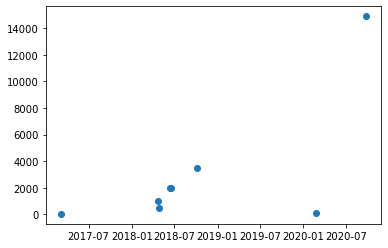

In [24]:
plt.scatter(df5hd['date'],df5hd['takaout'])

In [26]:
df5h.head(100)

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
225731,2017-03-07,no rec,05RAF,EHC,home construction,building parts and materials,no rec,0,30,nails for house repair,no rec,out,expenditure,4
442953,2018-04-24,no rec,05RAF,EHC,home construction,carpentry,no rec,0,1000,"carpenter, repairing shop",no rec,out,costs,4
444080,2018-04-26,no rec,05RAF,EHC,home construction,carpentry,no rec,0,500,"carpenter, shop repair",no rec,out,costs,4
469622,2018-06-13,no rec,05RAF,EHC,home construction,building parts and materials,br,0,2000,Tin,no rec,out,expenditure,4
471930,2018-06-18,no rec,05RAF,EHC,home construction,building parts and materials,br,0,2000,Tin,no rec,out,expenditure,4
530776,2018-10-06,no rec,05RAF,EHC,home construction,building parts and materials,br,0,2000,tin for house repair,no rec,out,expenditure,4
530777,2018-10-06,no rec,05RAF,EHC,home construction,building parts and materials,br,0,1500,wood for house repair,no rec,out,expenditure,4
798110,2020-02-23,no rec,05RAF,EHC,home construction,building parts and materials,no rec,0,85,nails for house pepair,no rec,out,expenditure,4
873792,2020-09-22,no rec,05RAF,EHC,home construction,building parts and materials,br,0,14900,"tin , wood etc",no rec,out,expenditure,4


In [28]:
df5hd.head(1000)

,date,takaout
0,2017-03-07,30.0
1,2017-03-08,NaN
2,2017-03-09,NaN
3,2017-03-10,NaN
4,2017-03-11,NaN
5,2017-03-12,NaN
6,2017-03-13,NaN
7,2017-03-14,NaN
8,2017-03-15,NaN
9,2017-03-16,NaN


In [18]:
df5hd=df5h.groupby([pd.Grouper(key='date',freq='D')])['takaout']
df27hp=df27h.groupby('date')['takaout'].sum()
df5hd=df5hd.to_frame()

In [20]:
df5hd.head()

225731       30
442953     1000
444080      500
469622     2000
471930     2000
530776     2000
530777     1500
798110       85
873792    14900
Name: takaout, dtype: int64

In [117]:
df5i=df5.groupby([pd.Grouper(key='date',freq='M')])['takain'].sum()
df5i=df5i.to_frame()
df5i=df5i.reset_index()


In [118]:
df5i

,date,takain
0,2015-08-31,18970
1,2015-09-30,19696
2,2015-10-31,30011
3,2015-11-30,13543
4,2015-12-31,15844
5,2016-01-31,19090
6,2016-02-29,20730
7,2016-03-31,16076
8,2016-04-30,13421
9,2016-05-31,27908


In [123]:
df5isum=df5i['takain'].sum()
df5isum

358676

In [126]:
df5iavg=df5isum/67
df5iavg

5353.373134328358

In [119]:
df5hd

,date,takaout
0,2017-03-31,30.0
1,2017-04-30,NaN
2,2017-05-31,NaN
3,2017-06-30,NaN
4,2017-07-31,NaN
5,2017-08-31,NaN
6,2017-09-30,NaN
7,2017-10-31,NaN
8,2017-11-30,NaN
9,2017-12-31,NaN


In [120]:
df5i.drop(df5i.loc[df5i['date'] < '2017-03-31'].index, inplace=True)
df5i.drop(df5i.loc[df5i['date'] > '2020-09-30'].index, inplace=True)

In [130]:
df5iavg2=df5i['takain']/df5iavg
df5iavg2

19    2.827750
20    2.229249
21    2.055713
22    4.527799
23    3.443810
24    4.250778
25    1.409579
26    1.265557
27    1.078759
28    1.415930
29    1.534173
30    0.838350
31    2.001729
32    1.708082
33    1.191212
34    1.534546
35    2.324142
36    1.732926
37    2.006959
38    1.956523
39    1.749738
40    1.513252
41    1.237537
42    0.903169
43    1.102482
44    1.240339
45    1.713873
46    1.242394
47    1.406216
48    0.468116
49    1.061387
50    0.823593
51    0.816495
52    0.627081
53    1.445631
54    0.653233
55    1.556962
56    0.091157
57    1.076518
58    0.423285
59    0.785299
60    0.389474
61    3.339203
Name: takain, dtype: float64

In [133]:
pd.concat([df5i,df5iavg2],axis=1)

,date,takain,takain
19,2017-03-31,15138,2.827750
20,2017-04-30,11934,2.229249
21,2017-05-31,11005,2.055713
22,2017-06-30,24239,4.527799
23,2017-07-31,18436,3.443810
24,2017-08-31,22756,4.250778
25,2017-09-30,7546,1.409579
26,2017-10-31,6775,1.265557
27,2017-11-30,5775,1.078759
28,2017-12-31,7580,1.415930


In [135]:
plt.scatter(df5iavg2,df5hd['takaout'])

In [148]:
n=1
x=[]
for i in range(72):
    x.append("df{0}".format(n))
    n+=1
x

['df1',
 'df2',
 'df3',
 'df4',
 'df5',
 'df6',
 'df7',
 'df8',
 'df9',
 'df10',
 'df11',
 'df12',
 'df13',
 'df14',
 'df15',
 'df16',
 'df17',
 'df18',
 'df19',
 'df20',
 'df21',
 'df22',
 'df23',
 'df24',
 'df25',
 'df26',
 'df27',
 'df28',
 'df29',
 'df30',
 'df31',
 'df32',
 'df33',
 'df34',
 'df35',
 'df36',
 'df37',
 'df38',
 'df39',
 'df40',
 'df41',
 'df42',
 'df43',
 'df44',
 'df45',
 'df46',
 'df47',
 'df48',
 'df49',
 'df50',
 'df51',
 'df52',
 'df53',
 'df54',
 'df55',
 'df56',
 'df57',
 'df58',
 'df59',
 'df60',
 'df61',
 'df62',
 'df63',
 'df64',
 'df65',
 'df66',
 'df67',
 'df68',
 'df69',
 'df70',
 'df71',
 'df72']

In [153]:
dfu=[ '01KIF','02OBM', '03SAF', '04MAM','05RAF', '06SRF','07MOM',  
       '08SHF', '09SMM','10AFM',  '11SUM', '12KAF', '13NMM', '14HYM',
        '15IBM', '16ANM','17ATF', '18BIM', '19MDM','20ROF',  '21PJM',
       '22ALM',  '23HRM','24ABM', '25HEM', '26BIF', '27HDM','28HIM', '29ARM',
        '30HBM',  '31NLF','32FUF', '33AKF', '34NYF','35PTF', '36SKM',
        '37HSM','38JHF',  '39SNF', '40RBF', '41RZF','42LAF', '43SNM',
       '44RJM',  '45ADM', '46MZM','47AZM', '48RMM', '49YEM', 
       '50HZM',   '51SYF', '52KBY','53RKF', '54HOF','55RHF','56BAF','57SEF','58SHF','59SRF','60AJF', '61RDF',
       '62ARM','63GRF','64SRF','65MOF','66TUF','67SIM','68MAM', '69JIM',
       '70JOM','71UDM', '72SHM']
def xi(n):
    y="df{0}i".format(n)
    return y
def x(n):
    y="df{0}".format(n)
    return y


n=1
for i in dfu:
    #xi(n) =x(n).groupby([pd.Grouper(key='date',freq='M')])['takain'].sum()
    #df5i=df5i.to_frame()
    #df5i=df5i.reset_index()
    #print(i)
    x(i)=2
    n+=1
    
    

SyntaxError: cannot assign to function call (<ipython-input-153-7e9206d37478>, line 25)

In [158]:
dfu=[ '01KIF','02OBM', '03SAF', '04MAM','05RAF', '06SRF','07MOM',  
       '08SHF', '09SMM','10AFM',  '11SUM', '12KAF', '13NMM', '14HYM',
        '15IBM', '16ANM','17ATF', '18BIM', '19MDM','20ROF',  '21PJM',
       '22ALM',  '23HRM','24ABM', '25HEM', '26BIF', '27HDM','28HIM', '29ARM',
        '30HBM',  '31NLF','32FUF', '33AKF', '34NYF','35PTF', '36SKM',
        '37HSM','38JHF',  '39SNF', '40RBF', '41RZF','42LAF', '43SNM',
       '44RJM',  '45ADM', '46MZM','47AZM', '48RMM', '49YEM', 
       '50HZM',   '51SYF', '52KBY','53RKF', '54HOF','55RHF','56BAF','57SEF','58SHF','59SRF','60AJF', '61RDF',
       '62ARM','63GRF','64SRF','65MOF','66TUF','67SIM','68MAM', '69JIM',
       '70JOM','71UDM', '72SHM']
ID=[]
n=1
my_dict = {}
for i in range(72):
    a='df{0}'.format(n)
    ID.append(a)

def x(n):
    globals()[n]
    y=n+'i'
    y=n.groupby([pd.Grouper(key='date',freq='M')])['takain'].sum()
    y=y.to_frame()
    y=y.reset_index()
    return y


for j in ID:
    x(j)










KeyError: 'df1'

In [30]:
df22= df.drop(df[(df.code!="22ALM")].index)
df22h=df22.drop(df22[(df22.description!="home construction")].index)
df22h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 20484 to 884871
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         45 non-null     datetime64[ns]
 1   ref          45 non-null     object        
 2   code         45 non-null     object        
 3   class        45 non-null     object        
 4   description  45 non-null     object        
 5   subclass     45 non-null     object        
 6   tag          45 non-null     object        
 7   takain       45 non-null     int64         
 8   takaout      45 non-null     int64         
 9   details      45 non-null     object        
 10  notes        45 non-null     object        
 11  flow         45 non-null     object        
 12  type         45 non-null     object        
 13  quartile     45 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 5.3+ KB


In [11]:
df22h.head(50)

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
20484,2015-11-01,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-120,shop repair,no rec,out,costs,2
46403,2016-01-12,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-4950,pillar for home,no rec,out,expenditure,2
61937,2016-02-21,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-140,pollythine for house,no rec,out,expenditure,2
73717,2016-03-19,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-7900,tin,no rec,out,expenditure,2
74199,2016-03-20,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-465,"screw, etc",no rec,out,expenditure,2
98465,2016-05-13,no rec,22ALM,EHC,home construction,carpentry,no rec,0,-900,carpenter,no rec,out,expenditure,2
98469,2016-05-13,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-500,tin for roof,no rec,out,expenditure,2
250467,2017-05-05,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-35,pollythin for kitchen repair,no rec,out,expenditure,2
582363,2019-01-06,no rec,22ALM,EHC,home construction,labour,no rec,0,-100,kitchen repair ( labour),no rec,out,expenditure,2
626650,2019-03-27,no rec,22ALM,EHC,home construction,building parts and materials,no rec,0,-300,poly paper kitchen repair,no rec,out,expenditure,2


In [13]:
df22h.groupby(['subclass'])['takaout'].sum()

subclass
building parts and materials   -183405
carpentry                       -17900
fees                             -7500
labour                            -100
masonry                         -38000
painting                           -70
Name: takaout, dtype: int64

In [76]:
df22h.groupby('subclass').count()

,date,ref,code,class,description,tag,takain,takaout,details,notes,flow,type,quartile
subclass,,,,,,,,,,,,,
building parts and materials,31,31,31,31,31,31,31,31,31,31,31,31,31
carpentry,4,4,4,4,4,4,4,4,4,4,4,4,4
fees,1,1,1,1,1,1,1,1,1,1,1,1,1
labour,1,1,1,1,1,1,1,1,1,1,1,1,1
masonry,7,7,7,7,7,7,7,7,7,7,7,7,7
painting,1,1,1,1,1,1,1,1,1,1,1,1,1


In [77]:
df22hc=df22h.groupby('subclass').count()

In [ ]:
df22h.groupby(['subclass'])['takaout'].sum()/df22hc['date']

In [59]:
df22h['takaout']=df22h['takaout'].abs()
df22hd=df22h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df22hd=df22hd.to_frame()
df22hd=df22hd.reset_index()
df22hd.replace(0, np.nan, inplace=True)

In [69]:
plt.bar(df22hd['date'],df22hd['takaout'], width = 26)

<BarContainer object of 60 artists>

In [ ]:
df22hd=df22h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df22hd=df22hd.to_frame()
df22hd=df22hd.reset_index()
df22hd.replace(0, np.nan, inplace=True)

<BarContainer object of 60 artists>

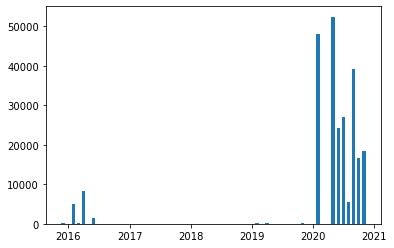

In [43]:
plt.bar(df22hd['date'],df22hd['takaout'], width = 20)

In [92]:
df22['takain'].sum()

681551

In [109]:
df22i=df22.groupby([pd.Grouper(key='date',freq='M')])['takain'].sum()
df22i=df22i.to_frame()
df22i=df22i.reset_index()

In [110]:
df22i.drop(df22i.loc[df22i['date'] > '2020-10-31'].index, inplace=True)

In [111]:
df22i.drop(df22i.loc[df22i['date'] < '2015-11-30'].index, inplace=True)

In [112]:
df22i

,date,takain
1,2015-11-30,6068
2,2015-12-31,9698
3,2016-01-31,4984
4,2016-02-29,9915
5,2016-03-31,13929
6,2016-04-30,4702
7,2016-05-31,9172
8,2016-06-30,5518
9,2016-07-31,12856
10,2016-08-31,6317


In [116]:
plt.scatter(df22i['takain'],df22hd['takaout'])

In [95]:
df22hd

,date,takaout
0,2015-11-30,120.0
1,2015-12-31,NaN
2,2016-01-31,4950.0
3,2016-02-29,140.0
4,2016-03-31,8365.0
5,2016-04-30,NaN
6,2016-05-31,1400.0
7,2016-06-30,NaN
8,2016-07-31,NaN
9,2016-08-31,NaN


In [104]:
df22i.head()

,date,takain
0,2015-10-31,3774
1,2015-11-30,6068
2,2015-12-31,9698
3,2016-01-31,4984
4,2016-02-29,9915


In [99]:
plt.scatter(df22i['takain'],df22hd['takaout'])

ValueError: x and y must be the same size

In [73]:
df27= df.drop(df[(df.code!="27HDM")].index)
df27h=df27.drop(df27[(df27.description!="home construction")].index)
df27h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 24864 to 940110
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         225 non-null    datetime64[ns]
 1   ref          225 non-null    object        
 2   code         225 non-null    object        
 3   class        225 non-null    object        
 4   description  225 non-null    object        
 5   subclass     225 non-null    object        
 6   tag          225 non-null    object        
 7   takain       225 non-null    int64         
 8   takaout      225 non-null    int64         
 9   details      225 non-null    object        
 10  notes        225 non-null    object        
 11  flow         225 non-null    object        
 12  type         225 non-null    object        
 13  quartile     225 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 26.4+ KB


In [18]:
df27h['subclass'].unique()

array(['building parts and materials', 'carpentry', 'masonry', 'design',
       'water and s17atftion', 'labour', 'brickbreaking', 'electric',
       'painting', 'electricity', 'water and sanitation', 'gas'],
      dtype=object)

In [19]:
df27h['takaout'].sum()

-2022265

In [86]:
df27h.head(230)

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
24864,2015-11-15,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-600,wood for door,no rec,out,expenditure,1
25487,2015-11-17,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-200,screw,no rec,out,expenditure,1
25489,2015-11-17,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-450,tin for door,no rec,out,expenditure,1
28585,2015-11-26,no rec,27HDM,EHC,home construction,carpentry,no rec,0,-100,carpenter,no rec,out,expenditure,1
60802,2016-02-18,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-7000,shop decoration,no rec,out,costs,1
61189,2016-02-19,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-410,cement,no rec,out,expenditure,1
61191,2016-02-19,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-35,sand,no rec,out,expenditure,1
61587,2016-02-20,no rec,27HDM,EHC,home construction,carpentry,no rec,0,-100,carpenter,no rec,out,expenditure,1
77037,2016-03-26,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-240,paint,no rec,out,expenditure,1
154483,2016-09-25,no rec,27HDM,EHC,home construction,building parts and materials,no rec,0,-200,door repairing of shop,no rec,out,costs,1


In [80]:
df27h.groupby('subclass').count()

,date,ref,code,class,description,tag,takain,takaout,details,notes,flow,type,quartile
subclass,,,,,,,,,,,,,
brickbreaking,4,4,4,4,4,4,4,4,4,4,4,4,4
building parts and materials,114,114,114,114,114,114,114,114,114,114,114,114,114
carpentry,6,6,6,6,6,6,6,6,6,6,6,6,6
design,5,5,5,5,5,5,5,5,5,5,5,5,5
electric,2,2,2,2,2,2,2,2,2,2,2,2,2
electricity,2,2,2,2,2,2,2,2,2,2,2,2,2
gas,1,1,1,1,1,1,1,1,1,1,1,1,1
labour,15,15,15,15,15,15,15,15,15,15,15,15,15
masonry,52,52,52,52,52,52,52,52,52,52,52,52,52


In [81]:
df27hc=df27h.groupby('subclass').count()

In [82]:
df27h.groupby(['subclass'])['takaout'].sum()/df27hc['date']

subclass
brickbreaking                   -2100.000000
building parts and materials   -12199.166667
carpentry                        -956.666667
design                          -1600.000000
electric                         -750.000000
electricity                     -4000.000000
gas                             -5000.000000
labour                          -1554.666667
masonry                         -9847.115385
painting                        -1395.000000
water and s17atftion            -3276.923077
water and sanitation            -3000.000000
dtype: float64

In [80]:
df27h['takaout']=df27h['takaout'].abs()
df27hd=df27h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df27hd=df27hd.to_frame()
df27hd=df27hd.reset_index()
df27hd.replace(0, np.nan, inplace=True)
plt.bar(df27hd['date'],df27hd['takaout'],width = 26)

<BarContainer object of 64 artists>

In [77]:
df27hd

,date,takaout
0,2015-11-30,1350.0
1,2015-12-31,NaN
2,2016-01-31,NaN
3,2016-02-29,7545.0
4,2016-03-31,240.0
5,2016-04-30,NaN
6,2016-05-31,NaN
7,2016-06-30,NaN
8,2016-07-31,NaN
9,2016-08-31,NaN


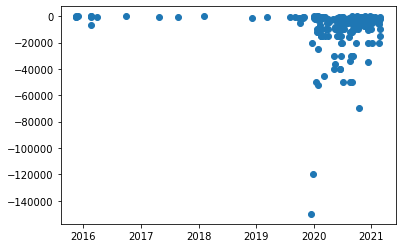

In [111]:
plt.scatter(df27h['date'],df27h['takaout'])

In [22]:
df27hg=df27h.groupby([pd.Grouper(key='date',freq='M')])['takaout']

In [23]:
df27hg.head(100)

24864      -600
25487      -200
25489      -450
28585      -100
60802     -7000
          ...  
937541    -6000
939220   -15000
939221    -2200
940109   -10000
940110     -900
Name: takaout, Length: 225, dtype: int64

In [42]:
df27hp=df27h.groupby('date')['takaout'].sum()
df27hp=df27hp.to_frame()
df27hp

,takaout
date,
2015-11-15,-600
2015-11-17,-650
2015-11-26,-100
2016-02-18,-7000
2016-02-19,-445
...,...
2021-02-04,-6000
2021-02-13,-5000
2021-02-22,-33230


In [58]:
pd.set_option('display.max_rows', None)
df27hp=df27hp.reset_index()
df27hp

,index,date,takaout
0,0,2015-11-15,-600
1,1,2015-11-17,-650
2,2,2015-11-26,-100
3,3,2016-02-18,-7000
4,4,2016-02-19,-445
5,5,2016-02-20,-100
6,6,2016-03-26,-240
7,7,2016-09-25,-200
8,8,2017-04-25,-500
9,9,2017-08-25,-800


<BarContainer object of 154 artists>

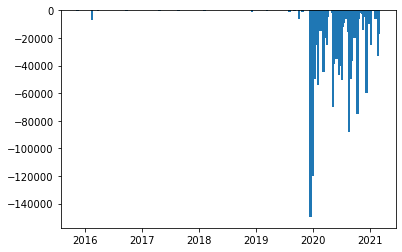

In [112]:
df27hp.replace(0, np.nan, inplace=True)
plt.bar(df27hp['date'],df27hp['takaout'],width=15)

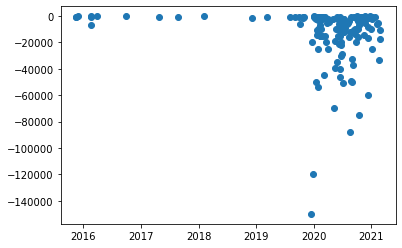

In [113]:
plt.scatter(df27hp['date'],df27hp['takaout'])

<BarContainer object of 64 artists>

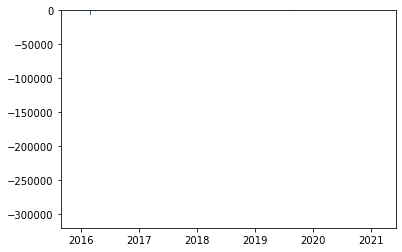

In [106]:
df27hm=df27h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df27hm=df27hm.to_frame()
df27hm=df27hm.reset_index()
df27hm.replace(0, np.nan, inplace=True)
plt.bar(df27hm['date'],df27hm['takaout'])

<BarContainer object of 12 artists>

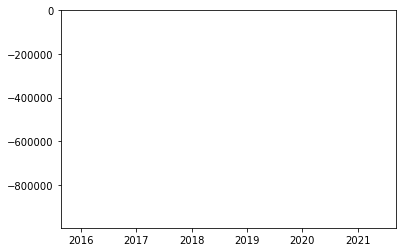

In [107]:
df27h6m=df27h.groupby([pd.Grouper(key='date',freq='6m')])['takaout'].sum()
df27h6m=df27h6m.to_frame()
df27h6m=df27h6m.reset_index()
df27h6m.replace(0, np.nan, inplace=True)
plt.bar(df27h6m['date'],df27h6m['takaout'])

In [108]:
df27h6m

,date,takaout
0,2015-11-30,-1350.0
1,2016-05-31,-7785.0
2,2016-11-30,-200.0
3,2017-05-31,-500.0
4,2017-11-30,-800.0
5,2018-05-31,-150.0
6,2018-11-30,NaN
7,2019-05-31,-1600.0
8,2019-11-30,-11000.0
9,2020-05-31,-850340.0


In [81]:
df31= df.drop(df[(df.code!="31NLF")].index)
df31h=df31.drop(df31[(df31.description!="home construction")].index)
df31h.groupby(['subclass'])['takaout'].sum()

subclass
brickbreaking                    -2700
building parts and materials   -693955
carpentry                         -480
labour                           -3600
masonry                         -97000
Name: takaout, dtype: int64

In [25]:
df31hs=df31h.groupby(['subclass'])['takaout'].sum()

In [27]:
df31hs.sum()

-797735

In [35]:
df31hs['labour']+df31hs['carpentry']+df31hs['masonry']+df31hs['brickbreaking']

-103780

In [82]:
df31h['takaout']=df31h['takaout'].abs()
df31hd=df31h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df31hd=df31hd.to_frame()
df31hd=df31hd.reset_index()
df31hd.replace(0, np.nan, inplace=True)
plt.bar(df31hd['date'],df31hd['takaout'],width = 26)

<BarContainer object of 55 artists>

In [83]:
df34= df.drop(df[(df.code!="34NYF")].index)
df34h=df34.drop(df34[(df34.description!="home construction")].index)
df34h.groupby(['subclass'])['takaout'].sum()
df34hs=df34h.groupby(['subclass'])['takaout'].sum()

In [39]:
df34hs.sum()

-1096360

In [40]:
df34h.groupby(['subclass'])['takaout'].sum()

subclass
building parts and materials   -794320
carpentry                       -67070
labour                           -5950
masonry                        -206350
water and s17atftion            -22670
Name: takaout, dtype: int64

In [43]:
df34h.head(200)

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
35073,2015-12-13,no rec,34NYF,EHC,home construction,carpentry,no rec,0,-700,carpenter,no rec,out,expenditure,1
35076,2015-12-13,no rec,34NYF,EHC,home construction,building parts and materials,no rec,0,-200,screw,no rec,out,expenditure,1
35457,2015-12-14,no rec,34NYF,EHC,home construction,carpentry,no rec,0,-200,carpenter,no rec,out,expenditure,1
35459,2015-12-14,no rec,34NYF,EHC,home construction,building parts and materials,no rec,0,-170,"screw , nut",no rec,out,expenditure,1
35843,2015-12-15,no rec,34NYF,EHC,home construction,carpentry,no rec,0,-500,carpenter,no rec,out,expenditure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926487,2021-01-27,no rec,34NYF,EHC,home construction,building parts and materials,br,0,-10000,cement,no rec,out,expenditure,1
927276,2021-01-29,no rec,34NYF,EHC,home construction,masonry,br,0,-20000,mason,no rec,out,expenditure,1
935540,2021-02-17,no rec,34NYF,EHC,home construction,building parts and materials,br,0,-6000,cement,no rec,out,expenditure,1
935541,2021-02-17,no rec,34NYF,EHC,home construction,masonry,br,0,-20000,mason,no rec,out,expenditure,1


In [63]:
pd.set_option('display.max_rows', None)
df34h.head(200)

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
35073,2015-12-13,no rec,34NYF,EHC,home construction,carpentry,no rec,0,-700,carpenter,no rec,out,expenditure,1
35076,2015-12-13,no rec,34NYF,EHC,home construction,building parts and materials,no rec,0,-200,screw,no rec,out,expenditure,1
35457,2015-12-14,no rec,34NYF,EHC,home construction,carpentry,no rec,0,-200,carpenter,no rec,out,expenditure,1
35459,2015-12-14,no rec,34NYF,EHC,home construction,building parts and materials,no rec,0,-170,"screw , nut",no rec,out,expenditure,1
35843,2015-12-15,no rec,34NYF,EHC,home construction,carpentry,no rec,0,-500,carpenter,no rec,out,expenditure,1
46480,2016-01-12,no rec,34NYF,EHC,home construction,building parts and materials,no rec,0,-430,cement,no rec,out,expenditure,1
46481,2016-01-12,no rec,34NYF,EHC,home construction,building parts and materials,no rec,0,-300,sand,no rec,out,expenditure,1
49167,2016-01-19,no rec,34NYF,EHC,home construction,masonry,no rec,0,-1200,mason,no rec,out,expenditure,1
71044,2016-03-13,no rec,34NYF,EHC,home construction,water and s17atftion,no rec,0,-3150,toilet cleaning charge,no rec,out,expenditure,1
135088,2016-08-09,no rec,34NYF,EHC,home construction,water and s17atftion,no rec,0,-50,toilet cleaning brush,no rec,out,expenditure,1


In [66]:
df34h.groupby('subclass').count()

,date,ref,code,class,description,tag,takain,takaout,details,notes,flow,type,quartile
subclass,,,,,,,,,,,,,
building parts and materials,72,72,72,72,72,72,72,72,72,72,72,72,72
carpentry,20,20,20,20,20,20,20,20,20,20,20,20,20
labour,3,3,3,3,3,3,3,3,3,3,3,3,3
masonry,28,28,28,28,28,28,28,28,28,28,28,28,28
water and s17atftion,13,13,13,13,13,13,13,13,13,13,13,13,13


In [44]:
index = df34h.index
condition = df34h["subclass"] == "water and s17atftion"
apples_indices = index[condition]
apples_indices_list = apples_indices.tolist()
print(apples_indices_list)

[71044, 135088, 193888, 199693, 199695, 202822, 202823, 208910, 208911, 209745, 282185, 469824, 469829]


In [48]:
df34h.loc[71044]

0
date              2016-03-13 00:00:00
ref                            no rec
code                            34NYF
class                             EHC
description         home construction
subclass         water and s17atftion
tag                            no rec
takain                              0
takaout                         -3150
details        toilet cleaning charge
notes                          no rec
flow                              out
type                      expenditure
quartile                            1
Name: 71044, dtype: object

In [49]:
df34h.loc[135088]

0
date             2016-08-09 00:00:00
ref                           no rec
code                           34NYF
class                            EHC
description        home construction
subclass        water and s17atftion
tag                           no rec
takain                             0
takaout                          -50
details        toilet cleaning brush
notes                         no rec
flow                             out
type                     expenditure
quartile                           1
Name: 135088, dtype: object

In [50]:
df34h.loc[193888]

0
date            2016-12-25 00:00:00
ref                          no rec
code                          34NYF
class                           EHC
description       home construction
subclass       water and s17atftion
tag                          no rec
takain                            0
takaout                       -4500
details                plastic pipe
notes                        no rec
flow                            out
type                    expenditure
quartile                          1
Name: 193888, dtype: object

In [51]:
df34h.loc[199693]

0
date            2017-01-07 00:00:00
ref                          no rec
code                          34NYF
class                           EHC
description       home construction
subclass       water and s17atftion
tag                          no rec
takain                            0
takaout                       -4500
details                 toilet bowl
notes                        no rec
flow                            out
type                    expenditure
quartile                          1
Name: 199693, dtype: object

In [52]:
df34h.loc[199695]

0
date            2017-01-07 00:00:00
ref                          no rec
code                          34NYF
class                           EHC
description       home construction
subclass       water and s17atftion
tag                          no rec
takain                            0
takaout                       -1200
details             s17atfry worker
notes                        no rec
flow                            out
type                    expenditure
quartile                          1
Name: 199695, dtype: object

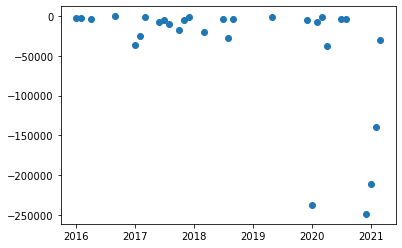

In [87]:
df34h6m=df34h.groupby([pd.Grouper(key='date',freq='1m')])['takaout'].sum()
df34h6m=df34h6m.to_frame()
df34h6m=df34h6m.reset_index() 
df34h6m.replace(0, np.nan, inplace=True)
plt.scatter(df34h6m['date'],df34h6m['takaout'])

In [84]:
df34h['takaout']=df34h['takaout'].abs()
df34hd=df34h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df34hd=df34hd.to_frame()
df34hd=df34hd.reset_index()
df34hd.replace(0, np.nan, inplace=True)
plt.bar(df34hd['date'],df34hd['takaout'],width = 26)

<BarContainer object of 63 artists>

In [85]:
df28= df.drop(df[(df.code!="28HIM")].index)
df28h=df28.drop(df28[(df28.description!="home construction")].index)
df28h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 18906 to 204226
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         170 non-null    datetime64[ns]
 1   ref          170 non-null    object        
 2   code         170 non-null    object        
 3   class        170 non-null    object        
 4   description  170 non-null    object        
 5   subclass     170 non-null    object        
 6   tag          170 non-null    object        
 7   takain       170 non-null    int64         
 8   takaout      170 non-null    int64         
 9   details      170 non-null    object        
 10  notes        170 non-null    object        
 11  flow         170 non-null    object        
 12  type         170 non-null    object        
 13  quartile     170 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 19.9+ KB


In [88]:
df28.tail()

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
222938,2017-02-28,no rec,28HIM,FLR,loan repayment made,co-op Shohoz Shonchoy,no rec,0,-30,Co Op SS l.intt,no rec,out,loan out,dropout
222939,2017-02-28,no rec,28HIM,EFO,food costs,miscellaneous,br,0,-600,misc,no rec,out,expenditure,dropout
222940,2017-02-28,no rec,28HIM,ETE,"snacks, treats, stimulants","betel nut, leaf",no rec,0,-30,pan,no rec,out,expenditure,dropout
222941,2017-02-28,no rec,28HIM,ETE,"snacks, treats, stimulants",tea+,no rec,0,-70,tea pan,no rec,out,expenditure,dropout
223077,2017-02-28,no rec,28HIM,FSD,savings deposited,co-op Shohoz Shonchoy,no rec,0,-20,Co OP SS,no rec,out,savings out,dropout


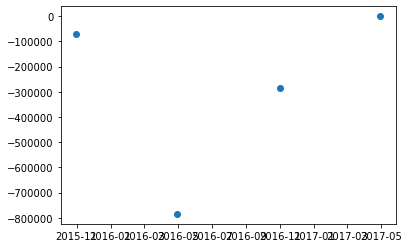

In [85]:
df28h6m=df28h.groupby([pd.Grouper(key='date',freq='6m')])['takaout'].sum()
df28h6m=df28h6m.to_frame()
df28h6m=df28h6m.reset_index()
df28h6m.replace(0, np.nan, inplace=True)
plt.scatter(df28h6m['date'],df28h6m['takaout'])

In [87]:
df28h['takaout']=df28h['takaout'].abs()
df28hd=df28h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df28hd=df28hd.to_frame()
df28hd=df28hd.reset_index()
df28hd.replace(0, np.nan, inplace=True)
plt.bar(df28hd['date'],df28hd['takaout'],width = 26)

<BarContainer object of 16 artists>

In [89]:
df01= df.drop(df[(df.code!="01KIF")].index)
df01h=df01.drop(df01[(df01.description!="home construction")].index)
df01h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 439692 to 710451
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3 non-null      datetime64[ns]
 1   ref          3 non-null      object        
 2   code         3 non-null      object        
 3   class        3 non-null      object        
 4   description  3 non-null      object        
 5   subclass     3 non-null      object        
 6   tag          3 non-null      object        
 7   takain       3 non-null      int64         
 8   takaout      3 non-null      int64         
 9   details      3 non-null      object        
 10  notes        3 non-null      object        
 11  flow         3 non-null      object        
 12  type         3 non-null      object        
 13  quartile     3 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 360.0+ bytes


In [91]:
df01['date']

2        2015-05-20
3        2015-05-20
4        2015-05-20
5        2015-05-20
6        2015-05-20
13       2015-05-20
15       2015-05-21
17       2015-05-21
18       2015-05-21
22       2015-05-21
24       2015-05-22
26       2015-05-22
27       2015-05-22
28       2015-05-22
29       2015-05-22
30       2015-05-22
36       2015-05-23
38       2015-05-23
40       2015-05-23
41       2015-05-23
46       2015-05-23
48       2015-05-24
50       2015-05-24
51       2015-05-24
52       2015-05-24
53       2015-05-24
57       2015-05-24
59       2015-05-25
60       2015-05-25
62       2015-05-25
63       2015-05-25
65       2015-05-25
66       2015-05-25
71       2015-05-25
73       2015-05-26
74       2015-05-26
77       2015-05-26
79       2015-05-26
80       2015-05-26
85       2015-05-26
90       2015-05-27
92       2015-05-28
93       2015-05-28
95       2015-05-28
96       2015-05-28
101      2015-05-28
103      2015-05-29
104      2015-05-29
105      2015-05-29
107      2015-05-29


In [90]:
df01h['takaout']=df01h['takaout'].abs()
df01hd=df01h.groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
df01hd=df01hd.to_frame()
df01hd=df01hd.reset_index()
df01hd.replace(0, np.nan, inplace=True)
plt.bar(df01hd['date'],df01hd['takaout'],width = 26)

<BarContainer object of 18 artists>

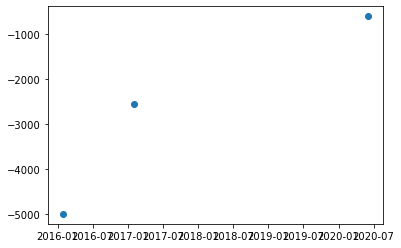

In [93]:
df03= df.drop(df[(df.code!="03SAF")].index)
df03h=df03.drop(df03[(df03.description!="home construction")].index)
df03h.info()

df03h6m=df03h.groupby([pd.Grouper(key='date',freq='1m')])['takaout'].sum()
df03h6m=df03h6m.to_frame()
df03h6m=df03h6m.reset_index()
df03h6m.replace(0, np.nan, inplace=True)
plt.scatter(df03h6m['date'],df03h6m['takaout'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 946 to 946
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1 non-null      datetime64[ns]
 1   ref          1 non-null      object        
 2   code         1 non-null      object        
 3   class        1 non-null      object        
 4   description  1 non-null      object        
 5   subclass     1 non-null      object        
 6   tag          1 non-null      object        
 7   takain       1 non-null      int64         
 8   takaout      1 non-null      int64         
 9   details      1 non-null      object        
 10  notes        1 non-null      object        
 11  flow         1 non-null      object        
 12  type         1 non-null      object        
 13  quartile     1 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 120.0+ bytes


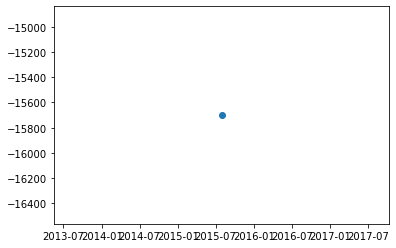

In [94]:
df04= df.drop(df[(df.code!="04MAM")].index)
df04h=df04.drop(df04[(df04.description!="home construction")].index)
df04h.info()

df04h6m=df04h.groupby([pd.Grouper(key='date',freq='1m')])['takaout'].sum()
df04h6m=df04h6m.to_frame()
df04h6m=df04h6m.reset_index()
df04h6m.replace(0, np.nan, inplace=True)
plt.scatter(df04h6m['date'],df04h6m['takaout'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1878 to 1878
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1 non-null      datetime64[ns]
 1   ref          1 non-null      object        
 2   code         1 non-null      object        
 3   class        1 non-null      object        
 4   description  1 non-null      object        
 5   subclass     1 non-null      object        
 6   tag          1 non-null      object        
 7   takain       1 non-null      int64         
 8   takaout      1 non-null      int64         
 9   details      1 non-null      object        
 10  notes        1 non-null      object        
 11  flow         1 non-null      object        
 12  type         1 non-null      object        
 13  quartile     1 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 120.0+ bytes


<BarContainer object of 1 artists>

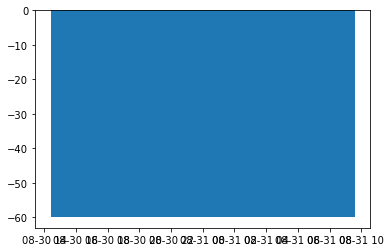

In [101]:
df06= df.drop(df[(df.code!="06SRF")].index)
df06h=df06.drop(df06[(df06.description!="home construction")].index)
df06h.info()

df06h6m=df06h.groupby([pd.Grouper(key='date',freq='1m')])['takaout'].sum()
df06h6m=df06h6m.to_frame()
df06h6m=df06h6m.reset_index()
df06h6m.replace(0, np.nan, inplace=True)
plt.bar(df06h6m['date'],df06h6m['takaout'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 7064 to 775753
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17 non-null     datetime64[ns]
 1   ref          17 non-null     object        
 2   code         17 non-null     object        
 3   class        17 non-null     object        
 4   description  17 non-null     object        
 5   subclass     17 non-null     object        
 6   tag          17 non-null     object        
 7   takain       17 non-null     int64         
 8   takaout      17 non-null     int64         
 9   details      17 non-null     object        
 10  notes        17 non-null     object        
 11  flow         17 non-null     object        
 12  type         17 non-null     object        
 13  quartile     17 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 2.0+ KB


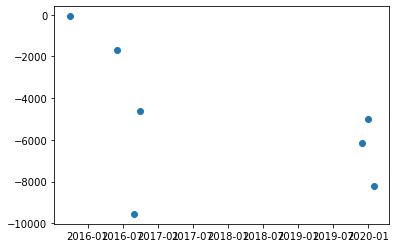

In [97]:
df07= df.drop(df[(df.code!="07MOM")].index)
df07h=df07.drop(df07[(df07.description!="home construction")].index)
df07h.info()

df07h6m=df07h.groupby([pd.Grouper(key='date',freq='1m')])['takaout'].sum()
df07h6m=df07h6m.to_frame()
df07h6m=df07h6m.reset_index()
df07h6m.replace(0, np.nan, inplace=True)
plt.scatter(df07h6m['date'],df07h6m['takaout'])


In [ ]:
df08= df.drop(df[(df.code!="08SHF")].index)
df08h=df08.drop(df08[(df08.description!="home construction")].index)
df08h.info()

<BarContainer object of 16 artists>

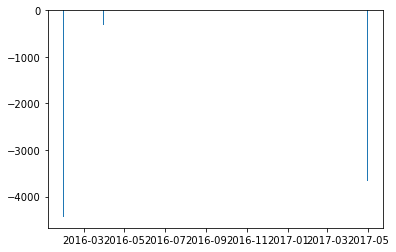

In [100]:
df08h6m=df08h.groupby([pd.Grouper(key='date',freq='1m')])['takaout'].sum()
df08h6m=df08h6m.to_frame()
df08h6m=df08h6m.reset_index()
df08h6m.replace(0, np.nan, inplace=True)
plt.bar(df08h6m['date'],df08h6m['takaout'])

In [44]:
x=np.linspace(0,10,100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96